In [2]:
pip install pingouin

  Created wheel for pingouin: filename=pingouin-0.3.10-py3-none-any.whl size=203403 sha256=e98c457c2a207616911ac82a48909903d77c91fd73b986c75828d0e0aa396382
  Stored in directory: c:\users\admin\appdata\local\pip\cache\wheels\26\7e\4b\d7815d18674094caa0d58cc40bb6a595b4a2e67ada30e2d42d
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7054 sha256=f900a3af3ecb4988987d19a23633d165a75456cd08d09c8d8c7ec4ecc3ab6ea9
  Stored in directory: c:\users\admin\appdata\local\pip\cache\wheels\6a\33\c4\0ef84d7f5568c2823e3d63a6e08988852fb9e4bc822034870a
Successfully built pingouin littleutils
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd

In [4]:
Pat = [5, 4, 4, 3, 9, 4]
Jack = [4, 8, 7, 5, 1, 5]
Alex = [9, 9, 8, 10, 4, 10]

In [5]:

combined_scores = Pat + Jack + Alex
names = (['Pat'] * len(Pat)) +  (['Jack'] * len(Jack)) +  (['Alex'] * len(Alex))

In [6]:
data= pd.DataFrame({'names':names,'score':combined_scores})
data

,names,score
0,Pat,5
1,Pat,4
2,Pat,4
3,Pat,3
4,Pat,9
5,Pat,4
6,Jack,4
7,Jack,8
8,Jack,7
9,Jack,5


In [7]:
data.groupby('names').mean()

,score
names,
Alex,8.333333
Jack,5.000000
Pat,4.833333


In [8]:

import statsmodels.api as sm
from statsmodels.formula.api import ols

In [9]:

lin_model= ols('score ~ names',data=data).fit()

tble= sm.stats.anova_lm(lin_model)
tble

,df,sum_sq,mean_sq,F,PR(>F)
names,2.0,46.777778,23.388889,4.488273,0.029668
Residual,15.0,78.166667,5.211111,NaN,NaN


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='names', ylabel='score'>

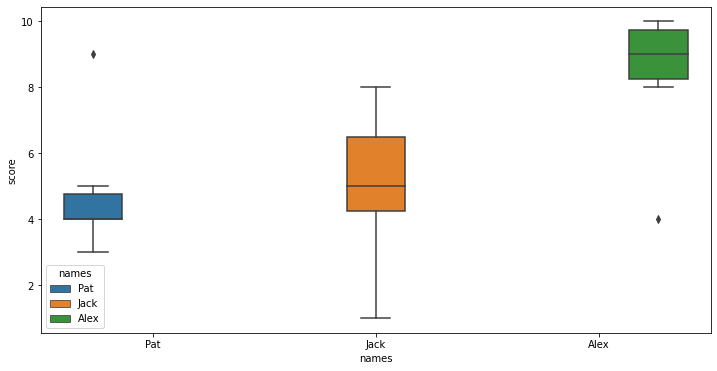

In [11]:

plt.figure(figsize=(12,6))
sns.boxplot(x='names',y='score',data=data,hue='names')

In [12]:

from statsmodels.stats.multicomp import MultiComparison

In [13]:
mulcompr = MultiComparison(data['score'],data['names'])
results = mulcompr.tukeyhsd(alpha=0.05)
print(results.summary())


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
  Alex   Jack  -3.3333 0.0568 -6.7554 0.0887  False
  Alex    Pat     -3.5 0.0447  -6.922 -0.078   True
  Jack    Pat  -0.1667    0.9 -3.5887 3.2554  False
---------------------------------------------------
